In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
feedback_form_df = pd.read_csv('data/feedback_form.csv')
feedback_form_df


og_feedback_form =  pd.read_csv('data/og_feedback_form.csv')
og_feedback_form



,how_engaging,enjoy_activity,enjoy_activity_why,activity_easy_understand,instruction_clear,activity_suited_learning_level,opportunity_work_own_pace,right_amount_support_resources,easy_instructions,activity_understand_topic_better,activity_understand_topic_better_why,reflect_personal_interest_learning_preferences,included_supported,included_supported_why,more_activities_like_this,more_activities_like_this_why,additional_comments,differentiation_strategy
0,5,Yes,I liked working with others.,Yes,Yes,3,Yes,3,Yes,Yes,I could ask for help while working.,Yes,Yes,I got help when I needed it.,Yes,It made the topic more interesting.,I liked today's class.,Mixed-Ability Groupings
1,3,Yes,The activity made the topic easier.,Yes,Yes,2,Yes,3,No,Yes,I could ask for help while working.,Yes,Yes,I got help when I needed it.,Yes,It was fun and easier to follow.,It helped me stay focused.,Mixed-Ability Groupings
2,3,Yes,I liked working with others.,Yes,Yes,3,Yes,3,Yes,Yes,The teacher explained it well during the activ...,No,Yes,The teacher checked in with me.,Yes,We all got involved more.,It made maths more fun.,Mixed-Ability Groupings
3,5,Yes,I liked working with others.,Yes,Yes,3,Yes,3,No,Yes,The teacher explained it well during the activ...,Yes,Yes,I didn't feel left out.,Yes,It was fun and easier to follow.,It helped me stay focused.,Mixed-Ability Groupings
4,4,Yes,The activity made the topic easier.,Yes,Yes,3,Yes,3,No,Yes,It broke the topic into smaller bits.,Yes,Yes,I got help when I needed it.,Yes,It made the topic more interesting.,Can we do more like this?,Mixed-Ability Groupings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,No,The game was too easy,Yes,Yes,2,Yes,5,Yes,Yes,The teacher explained it well during the activ...,No,Yes,The instructions were clear for everyone.,No,It made the topic more interesting.,It helped me stay focused.,Scaffolding
81,4,Yes,It was fun and helped me understand better.,Yes,Yes,3,Yes,3,No,Yes,Doing the task helped me remember the steps.,Yes,Yes,The teacher checked in with me.,Yes,I liked having more freedom.,It helped me stay focused.,Scaffolding
82,3,Yes,It was fun and helped me understand better.,Yes,Yes,3,Yes,3,No,Yes,Doing the task helped me remember the steps.,Yes,Yes,There were different options for everyone.,Yes,It was fun and easier to follow.,It helped me stay focused.,Scaffolding
83,5,Yes,I liked working with others.,Yes,Yes,3,Yes,3,No,Yes,It broke the topic into smaller bits.,Yes,Yes,There were different options for everyone.,Yes,We all got involved more.,Can we do more like this?,Scaffolding


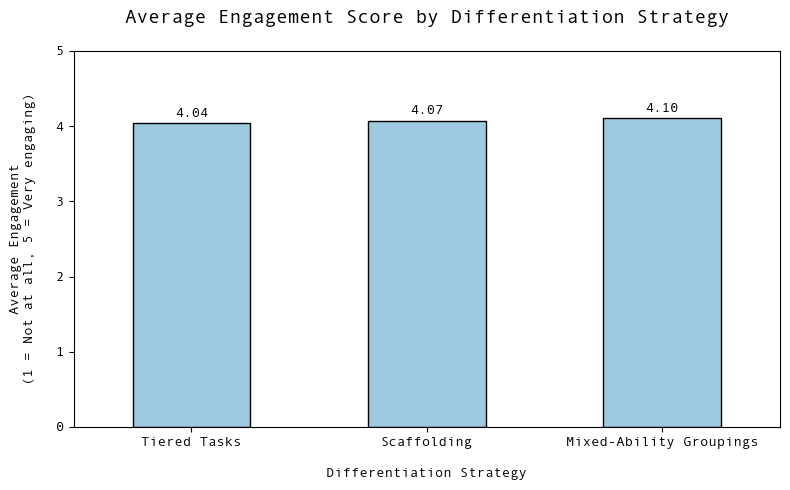

In [30]:

# Group by strategy and calculate average engagement
engagement_avg = feedback_form_df.groupby("differentiation_strategy")["how_engaging"].mean().sort_values()

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
engagement_avg.plot(kind='bar', color='#9ecae1', edgecolor='black', ax=ax)

# Add formatting
plt.ylabel("Engagement Score\n", fontname='Andale Mono', )
ax.set_ylabel("Average Engagement\n(1 = Not at all, 5 = Very engaging)\n", fontname='Andale Mono')
ax.set_xlabel("\nDifferentiation Strategy", fontname='Andale Mono')
ax.set_ylim(0, 5)
# ax.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(engagement_avg):
    ax.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontname='Andale Mono', fontsize=10)


plt.xticks(fontname = 'Andale Mono', rotation = 0) 
plt.yticks(fontname = 'Andale Mono') 


plt.savefig('graphs/new_average_engagement_score', dpi=300)
plt.tight_layout()
plt.show()


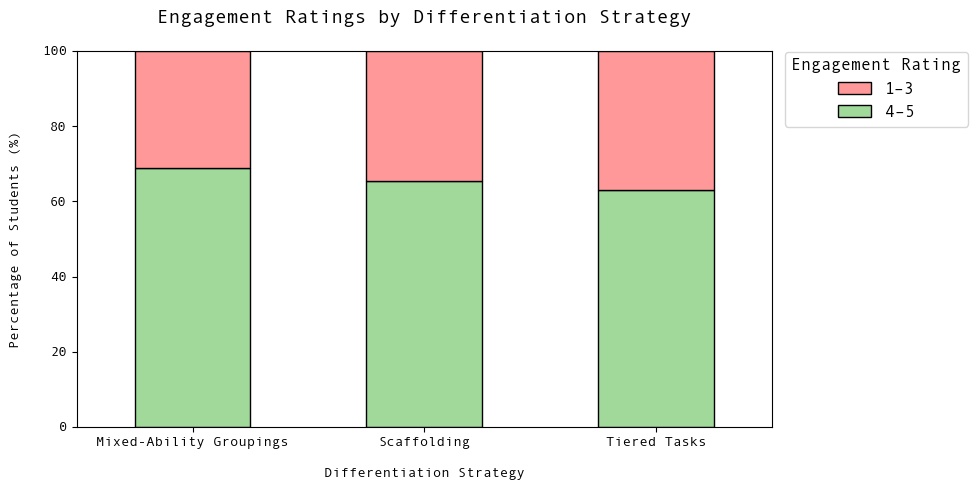

In [41]:
from matplotlib.font_manager import FontProperties

# Step 1: Create a new column marking whether students rated 4 or 5
og_feedback_form["engagement_high"] = og_feedback_form["how_engaging"].apply(lambda x: "4–5" if x >= 4 else "1–3")

# Step 2: Count percentages per group
stacked_data = (
    og_feedback_form.groupby("differentiation_strategy")["engagement_high"]
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

# Step 3: Reverse order to stack 1–3 on top of 4–5
stacked_data = stacked_data[["4–5", "1–3"]]  # "4–5" at bottom, "1–3" stacked on top

# Plot
ax = stacked_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 5), 
    color=["#a1d99b", "#ff9999"], 
    edgecolor='black'
)
'''
# Add percentage labels
for i, (index, row) in enumerate(stacked_data.iterrows()):
    bottom = 0
    for rating in ["4–5", "1–3"]:
        height = row[rating]
        ax.text(
            i, 
            bottom + height / 2, 
            f"{height:.1f}%", 
            ha='center', 
            va='center', 
            fontsize=10, 
            fontname='Andale Mono'
        )
        bottom += height
'''
# Formatting
plt.title("Engagement Ratings by Differentiation Strategy\n", fontsize=14, fontname='Andale Mono')



plt.ylabel("Percentage of Students (%)\n", fontname='Andale Mono')
plt.xlabel("\nDifferentiation Strategy", fontname='Andale Mono')
plt.ylim(0, 100)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Custom legend
legend_title_font = FontProperties(family='Andale Mono', size=12)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], 
    labels[::-1],
    title="Engagement Rating", 
    loc='upper center', 
    bbox_to_anchor=(1.15, 1.02), 
    prop={'size': 12, 'family': 'Andale Mono'},
    title_fontproperties=legend_title_font
)

plt.xticks(fontname='Andale Mono', rotation=0)
plt.yticks(fontname='Andale Mono')
plt.tight_layout()
plt.savefig('graphs/engagement_rating', dpi=300, bbox_inches='tight')
plt.show()


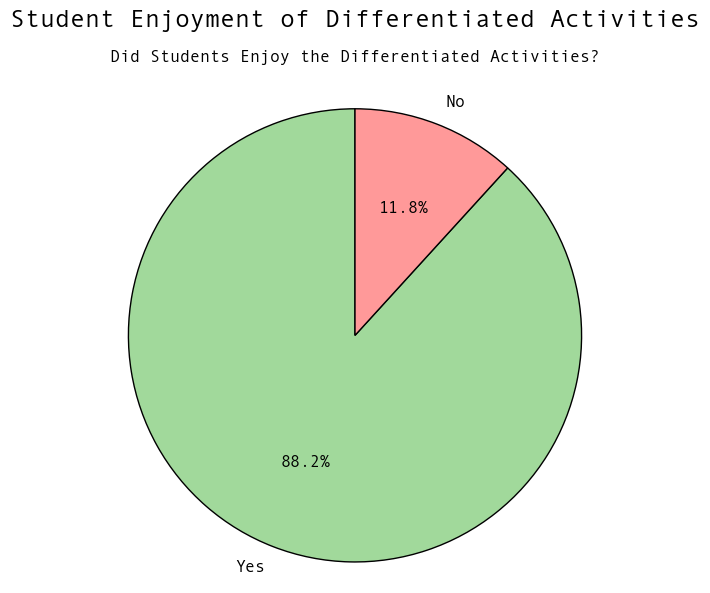

In [33]:

# Count 'Yes' and 'No' responses
enjoy_counts = feedback_form_df["enjoy_activity"].value_counts()
labels = enjoy_counts.index
sizes = enjoy_counts.values
colors = ['#a1d99b', '#ff9999']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the pie chart on the axis
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,wedgeprops={'edgecolor': 'black'}, textprops={'fontname': 'Andale Mono', 'fontsize': 12})

plt.suptitle(
    "Student Enjoyment of Differentiated Activities",
    fontname='Andale Mono',
    fontsize=18,
    #y=1.05  # adjust vertical spacing if needed
)

# Subtitle (smaller)
ax.set_title(
    "Did Students Enjoy the Differentiated Activities?",
    fontname='Andale Mono',
    fontsize=12
)

ax.axis('equal')  # Keep it a circle

plt.tight_layout()
plt.savefig('graphs/enjoy_differentiated_activity', dpi=300, bbox_inches='tight')
plt.show()

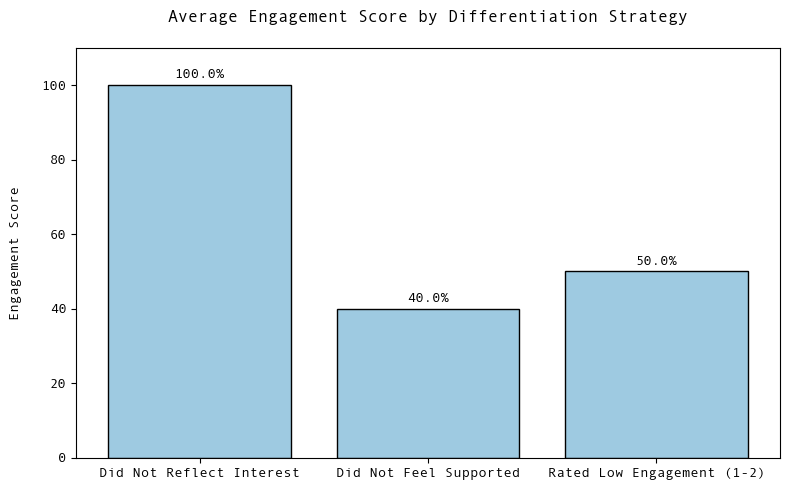

In [46]:
not_enjoyed_df = feedback_form_df[feedback_form_df["enjoy_activity"] == "No"]
total = len(not_enjoyed_df)

# Calculate percentages for key patterns
not_enjoyed_percentages = {
    "Did Not Reflect Interest": (not_enjoyed_df["reflect_personal_interest_learning_preferences"] == "No").sum() / total * 100,
    "Did Not Feel Supported": (not_enjoyed_df["included_supported"] == "No").sum() / total * 100,
    "Rated Low Engagement (1-2)": (not_enjoyed_df["how_engaging"] <= 2).sum() / total * 100,
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bar chart with percentages
bars = ax.bar(not_enjoyed_percentages.keys(), not_enjoyed_percentages.values(), color='#9ecae1',edgecolor='black')

# Add percentage labels on top
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', va='bottom',fontname = 'Andale Mono')

# Formatting
plt.ylabel("Engagement Score\n", fontname='Andale Mono')
# plt.xlabel("\nDifferentiation Strategy", fontname='Andale Mono')
ax.set_ylim(0, 110)
ax.set_title("Average Engagement Score by Differentiation Strategy\n",fontname = 'Andale Mono')
# ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(fontname = 'Andale Mono', rotation = 0) 
plt.yticks(fontname = 'Andale Mono') 



plt.tight_layout()
plt.savefig('graphs/why_not_enjoy', dpi=300, bbox_inches='tight')
plt.show()

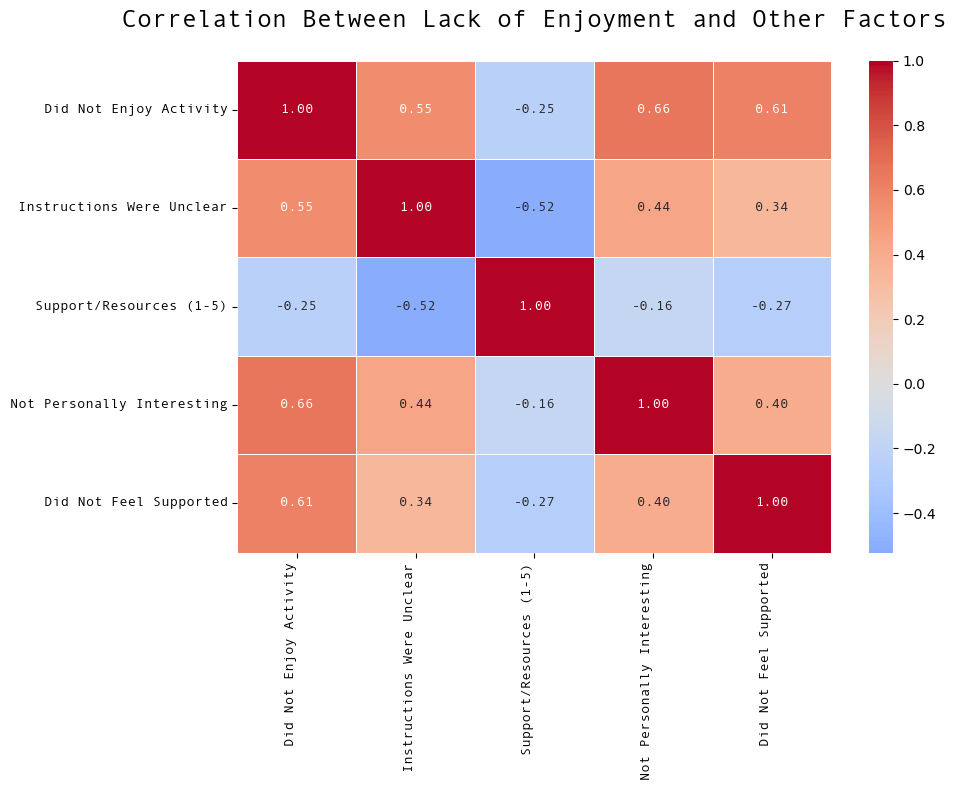

In [108]:
# Rename columns for readability
corr_data_renamed = corr_data.rename(columns={
    "not_enjoyed": "Did Not Enjoy Activity",
    "unclear_instruction": "Instructions Were Unclear",
    "support_resources": "Support/Resources (1-5)",
    "no_personal_interest": "Not Personally Interesting",
    "not_supported": "Did Not Feel Supported"
})

# Compute correlation matrix
correlation_matrix = corr_data_renamed.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot_kws={"fontname": "Andale Mono"},
    fmt=".2f"
)
plt.title("Correlation Between Lack of Enjoyment and Other Factors\n", fontname='Andale Mono', fontsize=18)
plt.xticks(fontname='Andale Mono', rotation=90, ha='right')
plt.yticks(fontname='Andale Mono', rotation=0)


plt.tight_layout()
plt.savefig('graphs/correlation', dpi=300, bbox_inches='tight')
plt.show()
